In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale

# Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

In [2]:
#let's bring in our dataframe and take a peek

df = wrangle.wrangle_telco()

df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.80
2,0016-QLJIS,65,90.45,5957.90
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


In [3]:
df.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges      float64
dtype: object

In [4]:
df.shape

(1685, 4)

In [5]:
df.customer_id.nunique

<bound method IndexOpsMixin.nunique of 0       0013-SMEOE
1       0014-BMAQU
2       0016-QLJIS
3       0017-DINOC
4       0017-IUDMW
           ...    
1690    9964-WBQDJ
1691    9972-EWRJS
1692    9975-GPKZU
1693    9993-LHIEB
1694    9995-HOTOH
Name: customer_id, Length: 1685, dtype: object>

Don't need the customer id for exploration and since it's unique I am setting it as the index


In [6]:
df = df.set_index("customer_id")

In [7]:
# now I am going to split and scale my data
train, test = split_scale.split_my_data(df)

In [8]:
test

,tenure,monthly_charges,total_charges
customer_id,,,
1927-QEWMY,72,20.50,1502.25
2773-OVBPK,67,111.30,7567.20
5574-NXZIU,63,109.20,7049.75
8347-GDTMP,64,19.45,1225.65
9178-JHUVJ,24,24.10,587.40
...,...,...,...
9114-DPSIA,72,81.00,5750.00
8999-YPYBV,45,84.35,3858.05
1635-NZATJ,71,25.45,1789.65


In [9]:
train

,tenure,monthly_charges,total_charges
customer_id,,,
3396-DKDEL,70,115.15,8250.00
8966-KZXXA,36,25.10,930.95
8857-CUPFQ,63,19.25,1237.65
6901-GOGZG,60,84.95,4984.85
8606-OEGQZ,18,25.30,454.65
...,...,...,...
6734-JDTTV,65,19.85,1267.05
8043-PNYSD,63,19.55,1245.60
8314-HTWVE,7,19.85,144.15


- Create a file, explore.py, that contains the following functions for exploring your variables (features & target).

1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

In [10]:
def plot_variable_pairs(dataframe):
    """This function returns a pairplot to help explore relationships"""
    return sns.pairplot(dataframe, kind="reg")

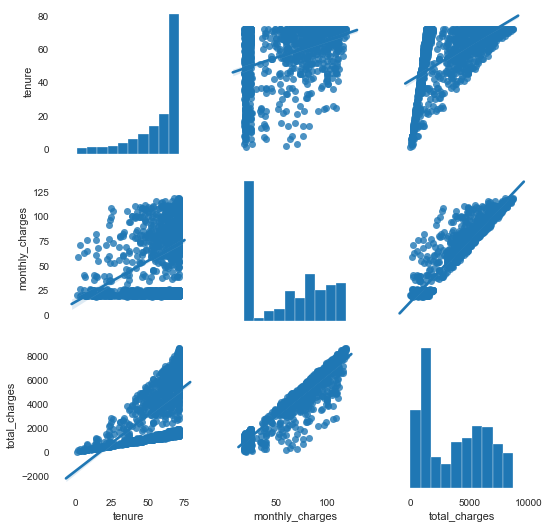

In [11]:
plot_variable_pairs(train)

2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

In [22]:
def months_to_years(tenure_months, df):
    df["tenure_years"] = tenure_months // 12
    return df

In [25]:
train_df = months_to_years(train.tenure, train)

In [28]:
train_df

,tenure,monthly_charges,total_charges,tenure_years
customer_id,,,,
3396-DKDEL,70,115.15,8250.00,5
8966-KZXXA,36,25.10,930.95,3
8857-CUPFQ,63,19.25,1237.65,5
6901-GOGZG,60,84.95,4984.85,5
8606-OEGQZ,18,25.30,454.65,1
...,...,...,...,...
6734-JDTTV,65,19.85,1267.05,5
8043-PNYSD,63,19.55,1245.60,5
8314-HTWVE,7,19.85,144.15,0


3. Write a function, plot_categorical_and_continous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

I'm just going to take a look at few different plots and choose the ones I like

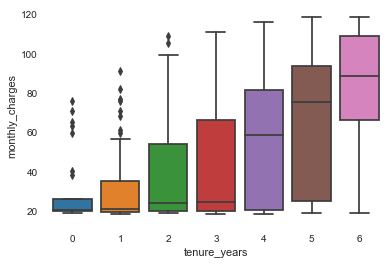

In [29]:
sns.boxplot(data=train_df, y='monthly_charges', x='tenure_years')

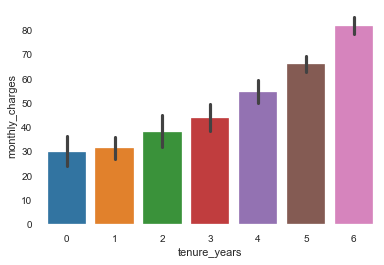

In [32]:
sns.barplot(x="tenure_years", y="monthly_charges", data=train_df)

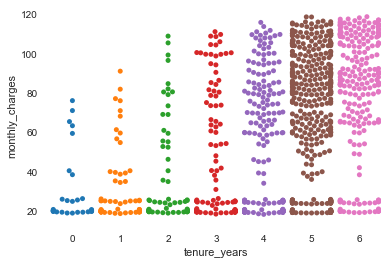

In [33]:
sns.swarmplot(x="tenure_years", y="monthly_charges", data=train_df)

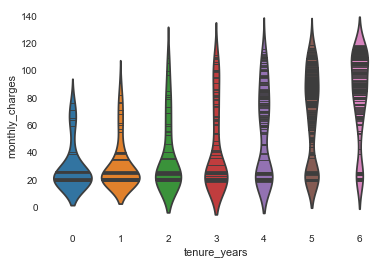

In [50]:
sns.violinplot(x="tenure_years", y="monthly_charges", data=train_df, inner="stick")

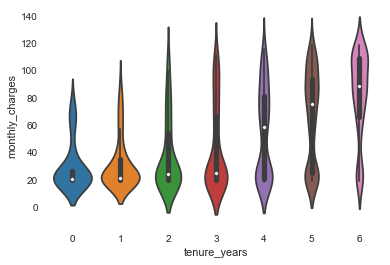

In [49]:
sns.violinplot(x="tenure_years", y="monthly_charges", data=train_df, inner="box")

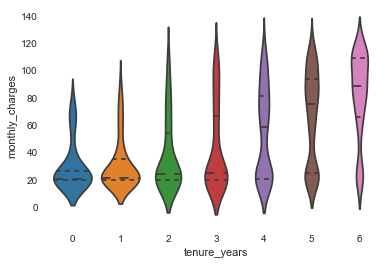

In [51]:
sns.violinplot(x="tenure_years", y="monthly_charges", data=train_df, inner="quartile")

In [46]:
def plot_categorical_and_continous_vars(categorical_var, continuous_var, dataframe):
    f, axes = plt.subplots(3,1, figsize=(16,16))
    
    sns.boxplot(y=categorical_var, x=continuous_var, data=dataframe, ax=axes[0])
    sns.swarmplot(y=categorical_var, x=continuous_var, data=dataframe, color =".2", alpha=.7, ax=axes[0])
    sns.violinplot(y=categorical_var, x=continuous_var, data=dataframe, inner="stick", ax=axes[1])
    sns.barplot(y=categorical_var, x=continuous_var, data=dataframe, ax=axes[2])

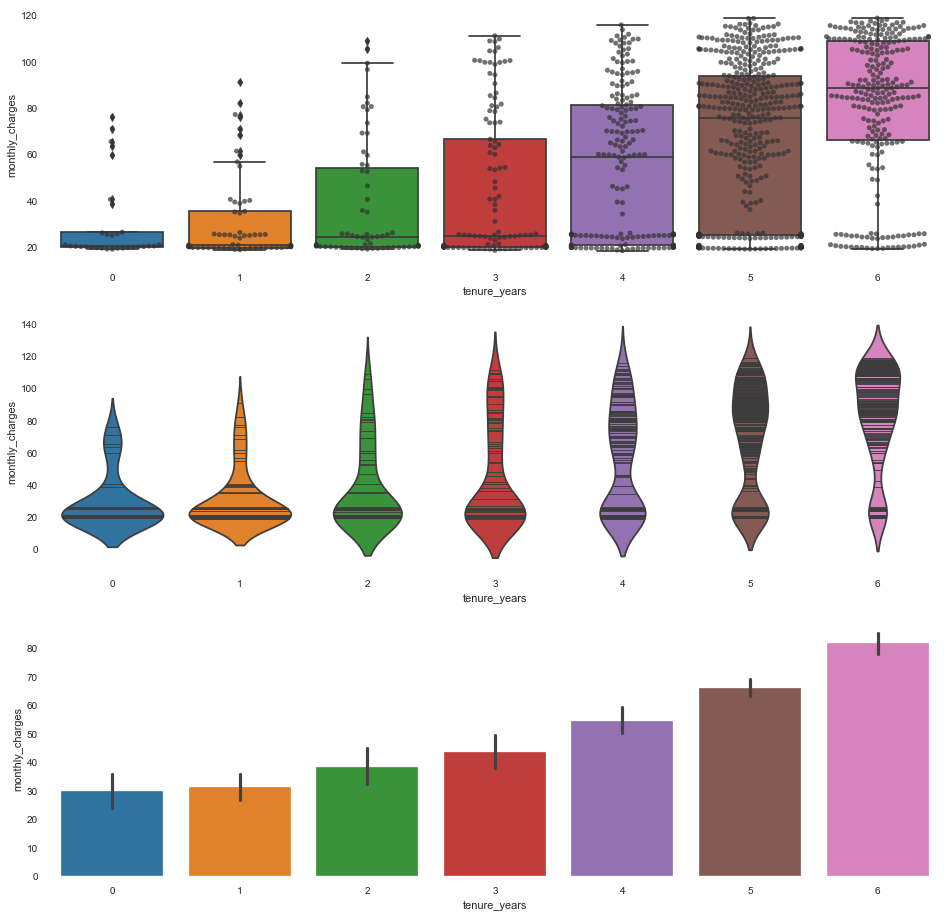

In [47]:
plot_categorical_and_continous_vars("monthly_charges", "tenure_years", train_df)